# Geodatenanalyse 1

## Tag 5 / Block 2 / Übung 13: Lineare Regression

In dieser Übung werden wir zwei Beispiele zur linearen Regression in Python durchführen. 

### 1. Einfache Lineare Regression "from scratch" 

Für dieses Beispiel werden wir sythetische Daten benutzen. Diese haben den Vorteil, dass man die Ergebnisse der Analyse direkt mit den Parametern der erzeugten Daten überprüfen, und so die Methode und den Code validieren kann. 

Erzeugt euch nun synthetische Daten für eine einfache lineare Regressionsanalyse: 

- generiert 100 normalverteilte Zufallswerte für eine unabhängige Variable mit einem Mittelwert von 1.5 und einer Standardabweichung von 2.5 (z.B. mit Hilfe von `np.random.randn()`).

- generiert ebenfalls 100 normalverteilte zufällige Residuen (mu = 0, std = 0.5).

- erzeugt schließlich mit Hilfe der unabhängigen Variablen die abhängige Variable über eine lineare Funktion mit einem beliebigen Achsenabschnitt und einer beliebigen Steigung, und addiert die Residuen dazu.

- Erezugt einen DataFrame aus den beiden Arrays.


In [11]:
import numpy as np
import pandas as pd

np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5
res = 0.5 * np.random.randn(100)       
y = 2 + 0.3 * X + res                  

data = pd.DataFrame({'X': X,'y': y})

Benutzt dann die Methode der Keinste-Quadrate-Schätzung, um diejenigen Regressionskoeffizienten (alpha, beta) zu berechnen, die die beste Übereinstimmung einer linearen Funktion und den erzeugten Daten liefern. 

In [12]:
x_mean = np.mean(X)
y_mean = np.mean(y)

cov_xy = data.cov()

beta = cov_xy.iloc[0,1]/cov_xy.iloc[0,0]
alpha = y_mean - beta * x_mean

print (alpha, beta)

1.9610974790350308 0.33037156620387265


Vergleicht diese berechneten Regressionskoeffizienten mit den im ersten Schritt von euch festgelegten Werten der linearen Funktion. Wenn Ihr alles richtig gemacht habt, sollten diese recht gut übereinstimmen. 

Für die Visualisierung der Regressionsanalyse wollen wir nun die synthetischen Daten (Scatterplot) und die Regressionsfunktion (Linie) gemeinsam darstellen. 
Vorhersagen für die Regressionsfunktion könnt Ihr an den Werten der unabhängigen Variablen erzeugen, in dem Ihr diese in die lineare Funktion mit den ermittelten Regressionskoeffizienten einsetzt.

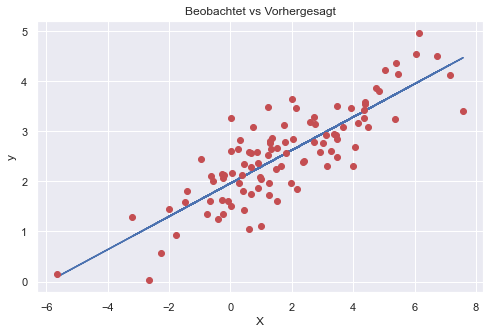

In [13]:
import matplotlib.pyplot as plt

ypred = alpha + beta * X # Vorhersage an Punkten X

plt.figure(figsize=(8, 5))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Beobachtet vs Vorhergesagt')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

### 2. Multiple Lineare Regression mit scikit-learn

Für diese Übung werden wir einen der Demo-Datensätze aus scikit-learn benutzten. Die "Boston Housing Data" enthält Daten zu 506 Häusern in Boston in Form von 13 Parametern: 

<img src="Boston_Data.png" alt="boston" width="500"/>


Wir wollen versuchen den Wert eines Hauses ("MEDV") in Abhängigkeit mehrerer anderer Parameter vorhersagen. 

Importiert dazu aus den scikit-learn Beispieldaten (`sklearn.datasets`) die Funktion `load_boston()`, und ladet damit den Datensatz ein. Wandelt anschließend die eigentlichen Daten (boston_dataset.data) in einen pandas DataFrame um, mit dem Attribut `feature_names` als Spalten. Erstellt für diesen DataFrame eine weiteren Spalte "MEDV" basierend auf `boston_dataset.target`.

In [5]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

Verschafft Euch nun einen Überblick über die Daten (explorativen Datenanalyse). Erstellt dafür eine Korrelationsmatrix mit den abhängigen und unabhängigen Variablen, und visualisiert diese (s. Übung Bivariate Statistik). 

Wenn Ihr für Eure Heatmap `seaborn` benutzt, könnt Ihr mit dem Befehl `sns.set(rc={'figure.figsize':(15,10)})` die Abbildungsgröße anpassen, sodass alle Wert zu lesen sind. 

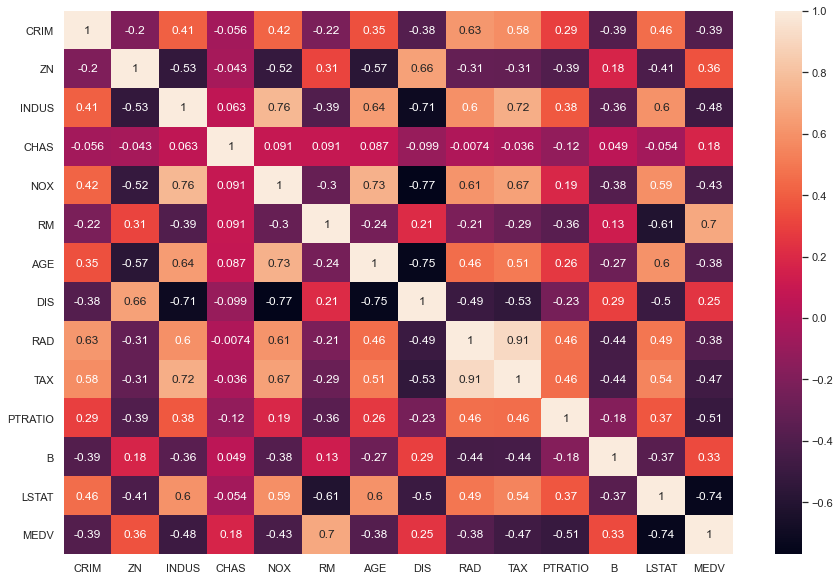

In [6]:
import seaborn as sns
correlation_matrix = boston.corr()

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


Wählt nun für die multiple lineare Regression der abhängigen Variablen zwei geeignete unabhängige Variablen aus: 

- diese sollten möglichst stark (> 0.7) mit der abhängigen Variablen "MEDV" korrelieren  

- aber weniger stark miteinander korrelieren (< 0.7)

Speichert diese zwei Variablen dann in einen separaten DataFrame ab.

In [7]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

Nun werden wir diesen Datensatz zur späteren Validierung in einen Trainings- und Test-Teil aufteilen. Die Funktion `sklearn.model_selection.train_test_split()` benötigt als Inputs die unabhängigen, sowie abhängigen Variablen und eine Angabe für die Größe des Test-Teils ("test_size=0.2").

So werden zufallsbasiert 20% der Daten in dem Test-Datensatz abgespeichert, die übrigen 80% in dem Trainingsdatensatz. Entsprechend müssen für die Funktion vier Outputs definiert werden (z.B. als X_train, X_test, Y_train, Y_test).

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Führt nun mit dem Trainingsdatensatz und der Funktion `sklearn.linear_model.LinearRegression()` eine lineare Regression durch. 

Wie die letzten Übungen auch, muss dafür zuerst ein Linear-Regression-Objekt erzeugt werden (mit den default Einstellungen). Passt dann über ".fit" das Regressions-Objekt an die beiden Traniningsdatensätze (X und Y) an. 

In [9]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

Nun wollen wir das angepasste multiple lineare Modell mit Hilfe geeigneter Fehlermaße und den Testdaten validieren. Importiert dafür aus `sklearn.metrics` den `mean_squared_error` und das Bestimmtheitsmaß `r2_score`. 

Wertet das Linear-Regression-Objekt über `.predict()` für die Werte der beiden abhängigen Variablen (jeweils von dem Trainings- und Testdatensatz) aus um Vorhersagewerte für die unabhängige Variable für beide Fälle zu erhalten. 

Um die Anpassung des Regressionsmodells an sich zu bewerten, bestimmt den RMSE zwischen den beobachteten und vorhergesagten Werten der abhängigen Variable an den Werten der unabhängigen Variable im Trainingsdatensatz. 

Um das Regressionsmodells außerhalb dieser Punkte zu validieren, verfahrt ebenso mit dem Testdatensatz. 

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)

# calcualte error criteria
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Modell Evaluation Trainingsdaten:")
print (rmse, r2)

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)

# calcualte error criteria
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("\n Modell Evaluation Testdaten:")
print (rmse, r2)

Modell Evaluation Trainingsdaten:
5.6371293350711955 0.6300745149331701

 Modell Evaluation Testdaten:
5.13740078470291 0.6628996975186954


Beurteilt nun zum Einen die Anpassung des linearen Modells an sich, als auch die Evaluation mit den Testdaten. Seid Ihr mit dem Ergebnis der Regression zufrieden?

Wenn Ihr noch Zeit habt, könnt Ihr die Daten und Ergebisse und der multiplen linearen Regression noch visualisierenm, z.B. um die Daten optisch auf Ausreisser, Linearität usw. überprüfen. 

## Ende

### Referenzen: 

https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0


https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
